# Get feature importance / SHAP values

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as pl
import ml_help
from time import time
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("./data/yonge_flow_incidents.csv.zip")
df

,currentSpeed,magnitudeOfDelay,length,delay,distance_from_point,day,hour,minute,event_description_Accident,event_description_Backed up traffic,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,10.0,2.0,372.91800,199.0,0.001789,14.0,12.0,45.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.0,0.0,302.76535,0.0,0.112289,14.0,12.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10.0,0.0,302.76535,0.0,0.112289,14.0,12.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10.0,0.0,273.82825,0.0,0.127365,14.0,12.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10.0,0.0,254.24487,0.0,0.112289,14.0,12.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10.0,0.0,0.00000,0.0,-1.000000,26.0,21.0,35.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94052,13.0,0.0,0.00000,0.0,-1.000000,26.0,21.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94053,18.0,0.0,0.00000,0.0,-1.000000,26.0,21.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94054,13.0,0.0,0.00000,0.0,-1.000000,26.0,21.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("currentSpeed",axis=1)
y = df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.80 = 0.20

# XGBoost

Fitting...
Fitting... OK! Took 3.4338362216949463 seconds
Explaining...
Explaining... OK! Took 2.348621368408203 seconds
Calculating shap values...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Calculating shap values... OK! Took 1.685530185699463 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


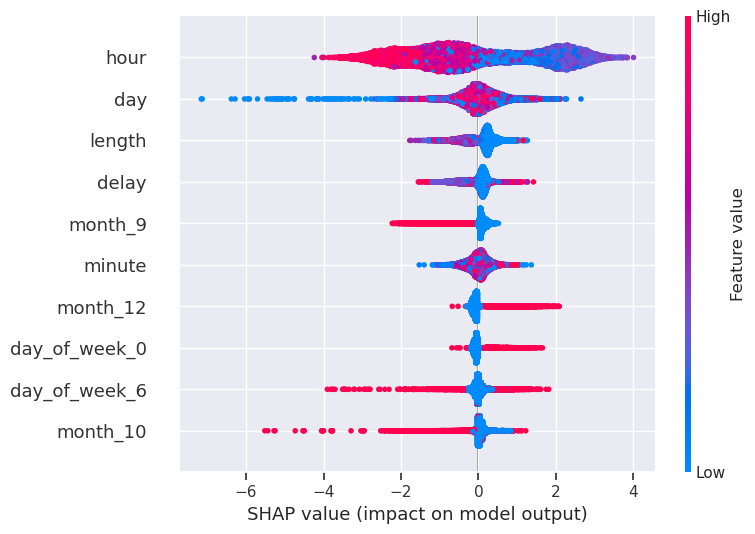

In [4]:
import xgboost as xgb

params = ml_help.params_to_dict("103_xgboost")
model = xgb.XGBRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
xgboost_fig = pl.gcf()
pl.savefig("./plots/106_xgboost.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/106_xgboost.png", bbox_inches="tight")

# Random Forest

Fitting...
Fitting... OK! Took 43.35226106643677 seconds
Explaining...
Explaining... OK! Took 0.01169586181640625 seconds
Calculating shap values...
Calculating shap values... OK! Took 103.9239547252655 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


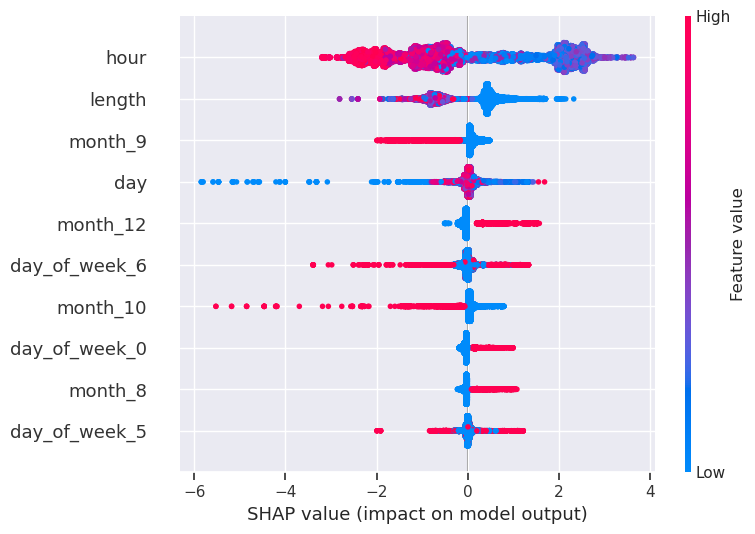

In [5]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("103_random_forest")
model = RandomForestRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/106_random_forest.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/106_random_forest.png", bbox_inches="tight")

# Decision Tree

Fitting...
Fitting... OK! Took 0.21254253387451172 seconds
Explaining...
Explaining... OK! Took 0.0010352134704589844 seconds
Calculating shap values...
Calculating shap values... OK! Took 0.33646702766418457 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


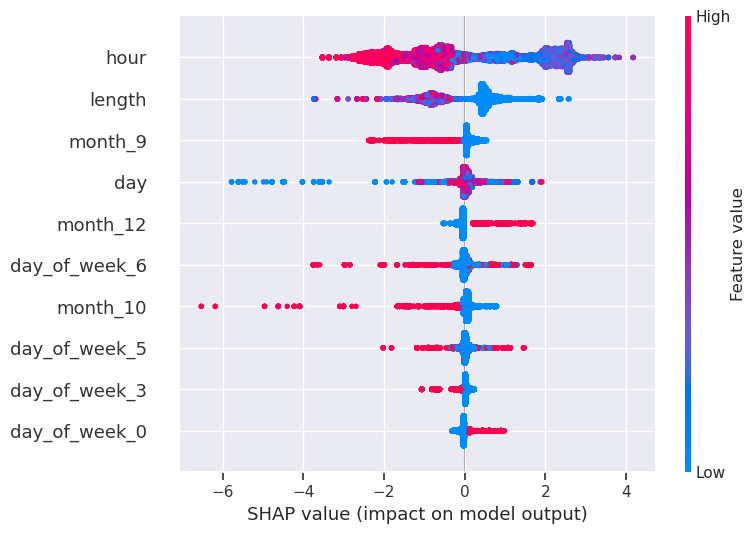

In [6]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("103_decision_tree")
model = DecisionTreeRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/106_decision_tree.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/106_decision_tree.png", bbox_inches="tight")

# MLP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Fitting...
Fitting... OK! Took 166.3139283657074 seconds
Explaining...
Explaining... OK! Took 0.0007483959197998047 seconds
Calculating shap values...


X does not have valid feature names, but MLPRegressor was fitted with feature names


  0%|          | 0/18812 [00:00<?, ?it/s]

Calculating shap values... OK! Took 3438.4722583293915 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


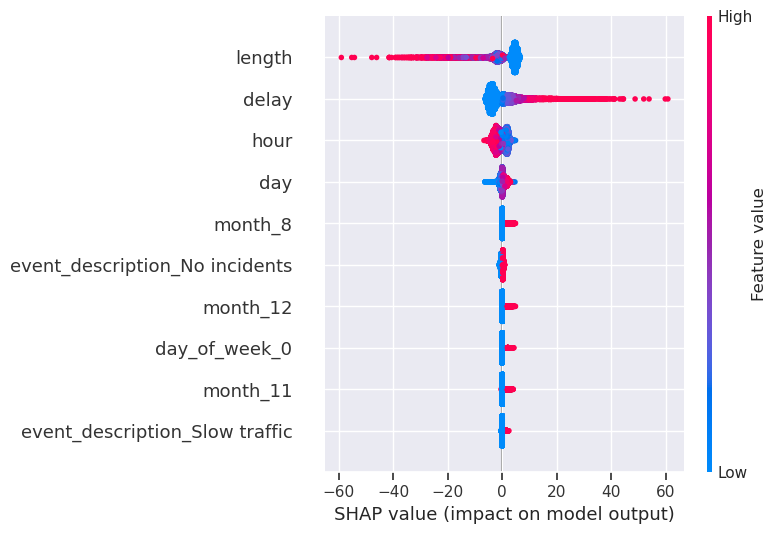

In [7]:
from sklearn.neural_network import MLPRegressor
import warnings

X_train_summary = shap.kmeans(X_train, 10)

params = ml_help.params_to_dict("103_mlpr")
model = MLPRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.KernelExplainer(model.predict, X_train_summary)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/106_mlp.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/106_mlp.png", bbox_inches="tight")